# Group Project 2

1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

## Hypothesis
In this project, we explore the relationship between fasting blood sugar (FBS) levels and heart disease by combining two datasets: heart.csv and heart_cleveland_upload.csv. After preprocessing the relevant columns, we test the null hypothesis that fasting blood sugar is independent of heart disease status against the alternative hypothesis that they are associated. Using the Chi-Square Test for Independence, we calculate the test statistic and p-value to evaluate the hypotheses. Visualization via a stacked bar plot supports our findings, offering insight into whether high FBS is a reliable indicator for heart disease risk.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

class HeartDiseaseAnalysis:
    def __init__(self, file1, file2):
        self.df1 = pd.read_csv(file1)
        self.df2 = pd.read_csv(file2)
        self.data = None
    
    def preprocess(self):
        combined = pd.concat([self.df1, self.df2], ignore_index=True)
        self.data = combined[['fbs', 'target']]
        return self.data
    
    def chi_square_test(self):
        contingency_table = pd.crosstab(self.data['fbs'], self.data['target'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        return chi2, p, dof, expected
    
    def plot_results(self):
        crosstab = pd.crosstab(self.data['fbs'], self.data['target'], normalize='index')
        crosstab.plot(kind='bar', stacked=True)
        plt.title('Proportion of Heart Disease by Fasting Blood Sugar Level')
        plt.xlabel('Fasting Blood Sugar (0 = <=120, 1 = >120)')
        plt.ylabel('Proportion')
        plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
        plt.show()


Chi-square Statistic: 1.5134, p-value: 0.2186


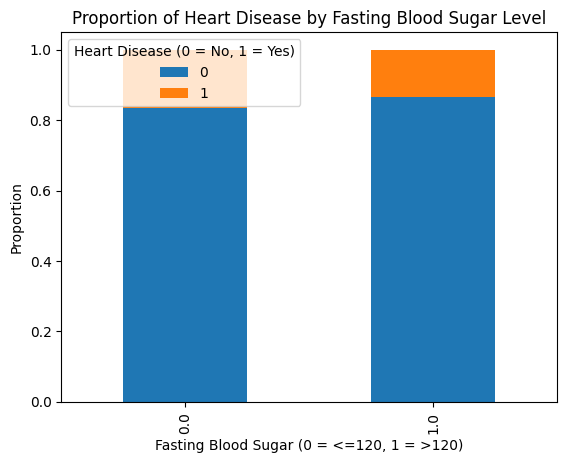

In [20]:
analysis = HeartDiseaseAnalysis('data/heart.csv', 'data/heart_cleveland_upload.csv')
data = analysis.preprocess()
chi2_stat, p_val, dof, expected = analysis.chi_square_test()
print(f"Chi-square Statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")

analysis.plot_results()


### Hypothesis Testing: Relationship Between Fasting Blood Sugar and Heart Disease

We test whether high fasting blood sugar (FBS) levels are associated with the presence of heart disease using the Chi-Square Test for Independence.

The Chi-Square Statistic is 1.5134, meaning observed and expected counts are similar, suggesting no association.

- **Null Hypothesis (H0):** High FBS and heart disease are independent.
- **Alternative Hypothesis (H1):** High FBS and heart disease are associated.

The Chi-Square test on the contingency table yields a test statistic and p-value.

- A p-value less than 0.05 indicates significant association, leading us to reject H0.
- Otherwise, we fail to reject H0.

The p-value here is 0.2186, indicating a weak association, so we fail to reject H0.
